<a href="https://colab.research.google.com/github/Scox97/DS7331_Group_Project/blob/Lab1--EDA/DS7331_Group2_Phishing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS7331 Project: Phishing Dataset

- Hayoung Cheon
- Steven Cox
- Erika Dupond
- Miguel Zavala

## Dataset Introduction and Generalization

The **PhiUSIIL Phishing URL Dataset** is a dataset consisting of over **230,000 URLs**, each classified as either a **phishing** or **legitimate** website. It includes more than 50 features that characterize URL structure, lexical patterns, and behavioral elements derived from content and metadata.

### Why Is This Data Important?

Phishing attacks are among the most prevalent cybersecurity threats, targeting users to steal credentials and sensitive information via deceptive links. Automating the detection of phishing URLs using machine learning can dramatically enhance online safety by:

- Reducing human dependency in detecting harmful links.
- Enabling real-time filtering in browsers and email systems.
- Supporting cybersecurity research and threat modeling.


### Defining and Measuring Outcomes

**Goal**: Build a model that accurately predicts whether a given URL is **phishing (0)** or **legitimate (1)**.

To determine if we've mined useful knowledge, we evaluate how well our model distinguishes phishing from legitimate URLs. This involves:

- Understanding **patterns** that commonly appear in phishing URLs.
- Selecting features that carry predictive value (e.g., unusual TLDs, long subdomains, obfuscated characters).


### How Do We Measure a Good Prediction?

The effectiveness of a prediction algorithm is commonly measured by the following metrics:

| Metric             | What It Tells Us                                 |
|--------------------|--------------------------------------------------|
| **Accuracy**       | Overall correctness of predictions               |
| **Precision**      | Proportion of predicted phishing URLs that are truly phishing |
| **Recall**         | Proportion of actual phishing URLs correctly identified |
| **F1 Score**       | Harmonic mean of precision and recall            |
| **ROC-AUC Score**  | How well the model separates classes             |

We choose metrics based on **business risk**:
- Prioritize **recall** if we want to catch as many phishing URLs as possible.
- Emphasize **precision** if false alarms (flagging legit URLs) are costly.


### Why We to use this dataset

We selected this dataset because it contains all the key characteristics needed to deeply explore the application of machine learning to a real-world cybersecurity problem. With its rich set of features and clear binary classification task, it provides an ideal environment for investigating how algorithms can detect phishing attacks. By analyzing the patterns that distinguish phishing from legitimate URLs and applying robust evaluation metrics, we can assess whether our models are extracting meaningful and actionable insights.


### Data Description



| Feature Name         | Description                               |
|----------------------|-------------------------------------------|
| URLSimilarityIndex     | Similarity to known legitimate URLs       |
| CharContinuationRate   | Rate of character continuations (hyphens, underscores)  |
| URLCharProb           | Probability of the URL being legitimate based on characters analysis  |
| TLDLength              | Length of Top-Level Domain            |
| NoOfSubDomain          | Number of subdomains                    |
| HasObfuscation         | Indicates if the URL has been obfuscated (made confusing)   |
| NoOfObfuscatedChar     | Number of obfuscated characters in the URL  |
| ObfuscationRatio       | Ratio of obfuscated characters to total characters in the URL    |
| NoOfLettersInURL        | Number of letters in the URL           |
| LetterRatioInURL       | Ratio of letters to total characters   |
| NoOfDegitsInURL         | Number of digits in the URL            |
| DegitRatioInURL        | Ratio of digits to total characters    |
| NoOfEqualsInURL         | Number of '=' signs                     |
| NoOfQMarkInURL          | Number of '?' signs                     |
| NoOfAmpersandInURL      | Number of '&' signs                     |
| NoOfOtherSpecialCharsInURL  | Number of other special characters in the URL   |
| SpacialCharRatioInURL   | Ratio of special characters to total characters   |
| IsHTTPS                | Boolean indicating if HTTPS is used    |

**Content and Structure Features:**

| Feature Name       | Description                             |
|--------------------|-----------------------------------------|
| LineOfCode          | Number of lines of code in HTML source   |
| LargestLineLength     | Length of the longest line in the HTML source  |
| HasTitle            | Boolean indicating if a title tag exists       |
| Title                | Content of the title tag                    |
| DomainTitleMatchScore  | Similarity score between domain name and page title   |
| URLTitleMatchScore     | Similarity score between URL and page title           |
| HasFavicon            | Boolean indicating if a favicon exists        |
| Robots                | Content of the robots.txt file (if it exists)    |
| IsResponsive          | Boolean indicating if the page is responsive       |
| NoOfURLRedirect         | Number of URL redirects                   |
| NoOfSelfRedirect         | Number of redirects to the same domain        |
| HasDescription        | Boolean indicating if a meta description tag exists    |
| NoOfPopup              | Number of pop-up windows                |
| NoOfiFrame             | Number of inline frames (iframes)            |
| HasExternalFormSubmit   | Boolean indicating if forms are submitted to an external domain    |
| HasSocialNet           | Boolean indicating if the page contains links to social networking sites  |
| HasSubmitButton        | Boolean indicating if a submit button exists       |
| HasHiddenFields         | Boolean indicating if hidden form fields exist     |
| HasPasswordField        | Boolean indicating if password fields exist      |

**Keyword/Category Indicators:**

| Feature Name   | Description                           |
|-----------------|---------------------------------------|
| Bank              | Related to banking (boolean)         |
| Pay                | Related to payments (boolean)       |
| Crypto            | Related to cryptocurrency (boolean)   |

**Link Analysis:**

| Feature Name     | Description                           |
|-------------------|---------------------------------------|
| HasCopyrightInfo    | Boolean indicating if copyright information exists  |
| NoOfImage              | Number of images on the page       |
| NoOfCSS                | Number of CSS files used            |
| NoOfJS                | Number of JavaScript files used      |
| NoOfSelfRef             | Number of links to the same domain    |
| NoOfEmptyRef           | Number of empty links              |
| NoOfExternalRef         | Number of links to external domains   |

**Target Variable:**

| Feature Name  | Description                          |
|-----------------|--------------------------------------|
| label                | Target variable (0: legitimate, 1: phishing)     |

### General Import

In [1]:
# general
import os
import numpy as np
import pandas as pd

# plots
from IPython.display import Image
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from IPython.display import Image

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

TABLE_LAYOUT = [
    {'selector': 'table', 'props': [('width', '100%')]},
    {'selector': 'thead th', 'props': [('text-align', 'center')]},
    {'selector': 'td', 'props': [('text-align', 'left')]}
]

%matplotlib inline


### Read data

Phishing dataset: https://archive.ics.uci.edu/static/public/967/phiusiil+phishing+url+dataset.zip

In [2]:
import pandas as pd

# URL to the dataset
url = "https://archive.ics.uci.edu/static/public/967/phiusiil+phishing+url+dataset.zip"

# Read the CSV file from the URL, ignoring the first column (index 0)
df = pd.read_csv(url, encoding="utf-8")
df = df.drop("FILENAME", axis=1)  # Column "FILENAME" can be ignored.
print("\nShape of data:", df.shape)
df.head()


Shape of data: (235795, 55)


URL  URLLength                      Domain  \
0    https://www.southbankmosaics.com         31    www.southbankmosaics.com   
1            https://www.uni-mainz.de         23            www.uni-mainz.de   
2      https://www.voicefmradio.co.uk         29      www.voicefmradio.co.uk   
3         https://www.sfnmjournal.com         26         www.sfnmjournal.com   
4  https://www.rewildingargentina.org         33  www.rewildingargentina.org   

   DomainLength  IsDomainIP  TLD  URLSimilarityIndex  CharContinuationRate  \
0            24           0  com               100.0              1.000000   
1            16           0   de               100.0              0.666667   
2            22           0   uk               100.0              0.866667   
3            19           0  com               100.0              1.000000   
4            26           0  org               100.0              1.000000   

   TLDLegitimateProb  URLCharProb  ...  Pay  Crypto  HasCopyrightInfo  \
0           0.522907     0.061933  ...    0       0                 1   
1           0.032650     0.050207  ...    0       0                 1   
2           0.028555     0.064129  ...    0       0                 1   
3           0.522907     0.057606  ...    1       1                 1   
4           0.079963     0.059441  ...    1       0                 1   

   NoOfImage  NoOfCSS  NoOfJS  NoOfSelfRef  NoOfEmptyRef  NoOfExternalRef  \
0         34       20      28          119             0              124   
1         50        9       8           39             0              217   
2         10        2       7           42             2                5   
3          3       27      15           22             1               31   
4        244       15      34           72             1               85   

   label  
0      1  
1      1  
2      1  
3      1  
4      1  

[5 rows x 55 columns]

## Lab One: Visualization and Data Preprocessing

### Generalizations

In [3]:
print(df.dtypes)

URL                            object
URLLength                       int64
Domain                         object
DomainLength                    int64
IsDomainIP                      int64
TLD                            object
URLSimilarityIndex            float64
CharContinuationRate          float64
TLDLegitimateProb             float64
URLCharProb                   float64
TLDLength                       int64
NoOfSubDomain                   int64
HasObfuscation                  int64
NoOfObfuscatedChar              int64
ObfuscationRatio              float64
NoOfLettersInURL                int64
LetterRatioInURL              float64
NoOfDegitsInURL                 int64
DegitRatioInURL               float64
NoOfEqualsInURL                 int64
NoOfQMarkInURL                  int64
NoOfAmpersandInURL              int64
NoOfOtherSpecialCharsInURL      int64
SpacialCharRatioInURL         float64
IsHTTPS                         int64
LineOfCode                      int64
LargestLineL

There are in total 55 columns including target/response variable label.
There are three types.
- continuous: 10
- Integer(Discrete): 41
- Categorical: 4

For now the integer types includes binary categorical columns that have values as 0 or 1.


#### Separate columns by type
- numeric columns
- binary columns
- categorical columns that has more than 2 values.

In [4]:
# Numeric columns
numeric_cols = df.select_dtypes(include=["number"]).columns
print("Numeric columns:", list(numeric_cols))


# Categorical columns (object, category, bool)
categorical_cols = df.select_dtypes(include=["object", "category", "bool"]).columns
print("Categorical columns:", list(categorical_cols))


# Identify binary columns (only 2 unique values, like 0 and 1)
binary_categorical_cols = [
    col for col in numeric_cols if df[col].nunique(dropna=False) == 2
]

# Get true continuous numeric columns
continuous_numeric_cols = [
    col for col in numeric_cols if col not in binary_categorical_cols
]

print("Binary Categorical Columns (0/1 type):", binary_categorical_cols)
print("Continuous Numeric Columns:", continuous_numeric_cols)

Numeric columns: ['URLLength', 'DomainLength', 'IsDomainIP', 'URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength', 'HasTitle', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef', 'label']
Categorical columns: ['URL', 'Domain', 'TLD', 'Title']
Binary Categorical Columns (0/1 type): ['IsDomainIP', 

In [5]:
print(f"Total numeric columns: {len(numeric_cols)}")
print(
    f"Binary categorical (numeric with 2 unique values): {len(binary_categorical_cols)}"
)
print(
    f"Continuous numeric features (numeric with >2 unique values): {len(continuous_numeric_cols)}"
)
print(f"Categorical (non-numeric) columns: {len(categorical_cols)}")

Total numeric columns: 51
Binary categorical (numeric with 2 unique values): 20
Continuous numeric features (numeric with >2 unique values): 31
Categorical (non-numeric) columns: 4


If we isolate that binary categorical out as categorical, the count will be following.
- continuous: 10
- Integer(Discrete): 21
- Categorical: 24

### Data Quality
  * Verify data quality: Explain any missing values, duplicate data, and outliers.  Are those mistakes? How do you deal with these problems?

#### MISSING VALUES

In [6]:
missing_info = df.isnull().sum()
missing_percent = (missing_info / len(df)) * 100
missing_summary = pd.DataFrame(
    {"Missing Values": missing_info, "Percentage (%)": missing_percent}
).sort_values(by="Missing Values", ascending=False)

print("Missing Value Summary:")
missing_summary_filtered = missing_summary[missing_summary["Missing Values"] > 0]

if missing_summary_filtered.empty:
    print("No missing data found.")
else:
    display(missing_summary_filtered)

Missing Value Summary:
No missing data found.


#### DUPLICATES

In [7]:
duplicate_count = df.duplicated().sum()
print(f"\nDuplicate Rows Found: {duplicate_count}")


Duplicate Rows Found: 0


The overall data quality is high, with no missing or duplicate entries detected.

#### Outliers

Although some outliers are associated with legitimate URLs and may represent noise, their presence is minimal—each case involving only 3 to 5 samples. Given the large dataset size of approximately 230,000 records, these outliers are unlikely to exert significant leverage on model performance. Furthermore, in the context of phishing detection, certain outliers may capture meaningful behavioral patterns. Therefore, we have opted to retain them to preserve potentially valuable information.

### Data Statistics

In [8]:
df.describe()

URLLength   DomainLength     IsDomainIP  URLSimilarityIndex  \
count  235795.000000  235795.000000  235795.000000       235795.000000   
mean       34.573095      21.470396       0.002706           78.430778   
std        41.314153       9.150793       0.051946           28.976055   
min        13.000000       4.000000       0.000000            0.155574   
25%        23.000000      16.000000       0.000000           57.024793   
50%        27.000000      20.000000       0.000000          100.000000   
75%        34.000000      24.000000       0.000000          100.000000   
max      6097.000000     110.000000       1.000000          100.000000   

       CharContinuationRate  TLDLegitimateProb    URLCharProb      TLDLength  \
count         235795.000000      235795.000000  235795.000000  235795.000000   
mean               0.845508           0.260423       0.055747       2.764456   
std                0.216632           0.251628       0.010587       0.599739   
min                0.000000           0.000000       0.001083       2.000000   
25%                0.680000           0.005977       0.050747       2.000000   
50%                1.000000           0.079963       0.057970       3.000000   
75%                1.000000           0.522907       0.062875       3.000000   
max                1.000000           0.522907       0.090824      13.000000   

       NoOfSubDomain  HasObfuscation  ...            Pay         Crypto  \
count  235795.000000   235795.000000  ...  235795.000000  235795.000000   
mean        1.164758        0.002057  ...       0.237007       0.023474   
std         0.600969        0.045306  ...       0.425247       0.151403   
min         0.000000        0.000000  ...       0.000000       0.000000   
25%         1.000000        0.000000  ...       0.000000       0.000000   
50%         1.000000        0.000000  ...       0.000000       0.000000   
75%         1.000000        0.000000  ...       0.000000       0.000000   
max        10.000000        1.000000  ...       1.000000       1.000000   

       HasCopyrightInfo      NoOfImage        NoOfCSS         NoOfJS  \
count     235795.000000  235795.000000  235795.000000  235795.000000   
mean           0.486775      26.075689       6.333111      10.522305   
std            0.499826      79.411815      74.866296      22.312192   
min            0.000000       0.000000       0.000000       0.000000   
25%            0.000000       0.000000       0.000000       0.000000   
50%            0.000000       8.000000       2.000000       6.000000   
75%            1.000000      29.000000       8.000000      15.000000   
max            1.000000    8956.000000   35820.000000    6957.000000   

         NoOfSelfRef   NoOfEmptyRef  NoOfExternalRef          label  
count  235795.000000  235795.000000    235795.000000  235795.000000  
mean       65.071113       2.377629        49.262516       0.571895  
std       176.687539      17.641097       161.027430       0.494805  
min         0.000000       0.000000         0.000000       0.000000  
25%         0.000000       0.000000         1.000000       0.000000  
50%        12.000000       0.000000        10.000000       1.000000  
75%        88.000000       1.000000        57.000000       1.000000  
max     27397.000000    4887.000000     27516.000000       1.000000  

[8 rows x 51 columns]

##### Mean, Median, Mode, and Variance

In [9]:
df_numeric = df.select_dtypes(include=["float64", "int64"])

mean = df_numeric.mean().round(1)
median = df_numeric.median().round(1)
mode = df_numeric.mode().round(1)
var = df_numeric.var().round(1)

print("Statistics Summary:")
print("Mean:\n", mean)
print("Median:\n", median)
print("Mode:\n", mode)
print("Variance:\n", var)

Statistics Summary:
Mean:
 URLLength                        34.6
DomainLength                     21.5
IsDomainIP                        0.0
URLSimilarityIndex               78.4
CharContinuationRate              0.8
TLDLegitimateProb                 0.3
URLCharProb                       0.1
TLDLength                         2.8
NoOfSubDomain                     1.2
HasObfuscation                    0.0
NoOfObfuscatedChar                0.0
ObfuscationRatio                  0.0
NoOfLettersInURL                 19.4
LetterRatioInURL                  0.5
NoOfDegitsInURL                   1.9
DegitRatioInURL                   0.0
NoOfEqualsInURL                   0.1
NoOfQMarkInURL                    0.0
NoOfAmpersandInURL                0.0
NoOfOtherSpecialCharsInURL        2.3
SpacialCharRatioInURL             0.1
IsHTTPS                           0.8
LineOfCode                     1141.9
LargestLineLength             12789.5
HasTitle                          0.9
DomainTitleMatchScore  

### Visualizations

##### Box Plots

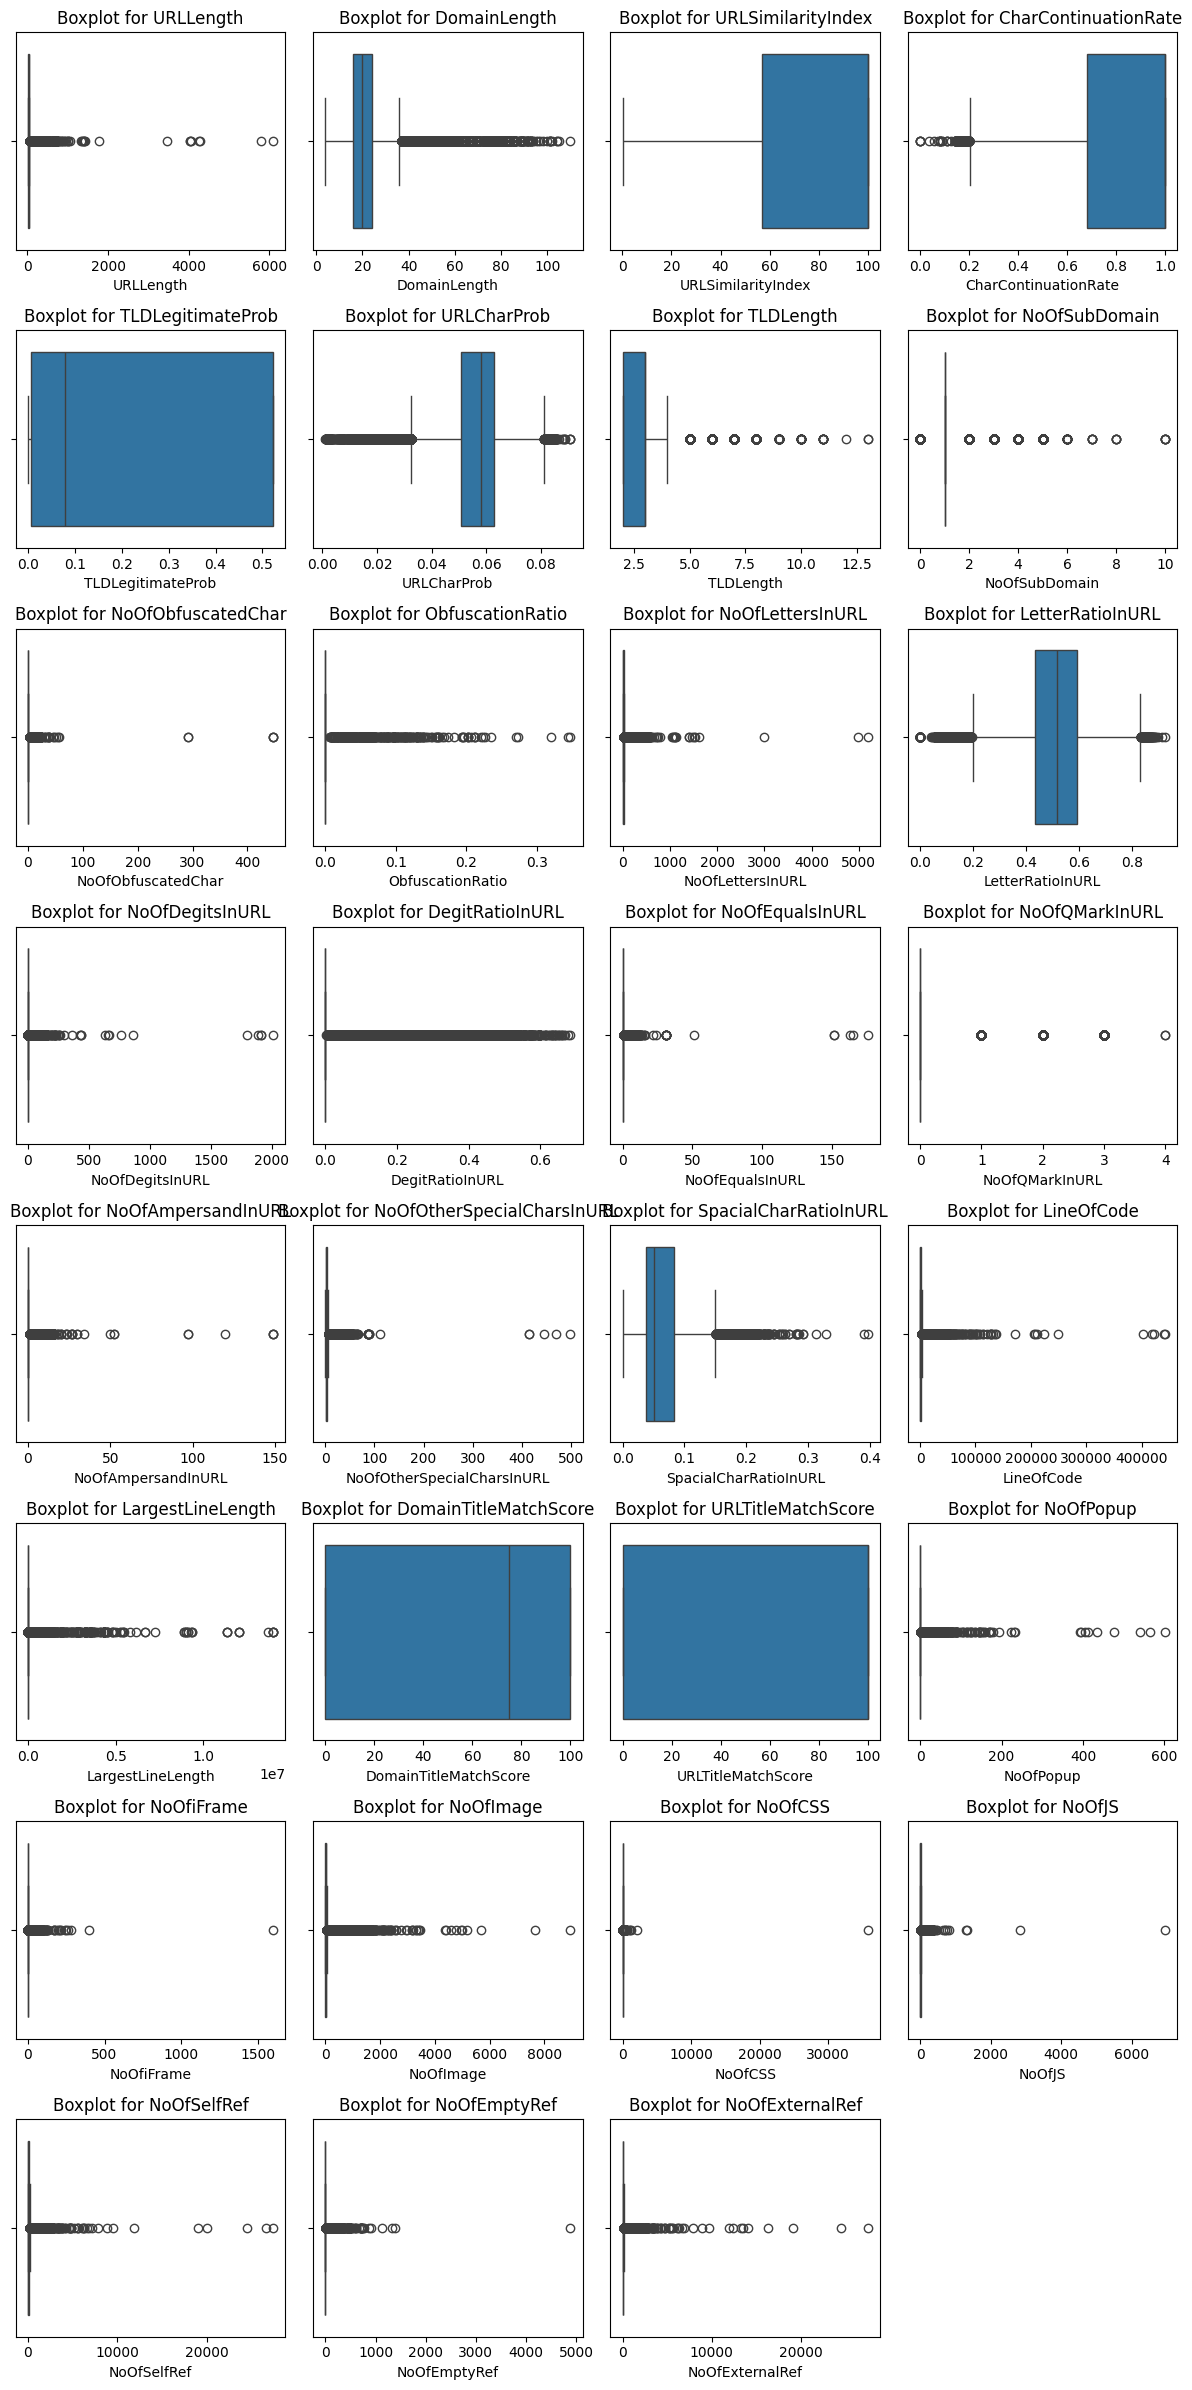

In [10]:
cols = 4
num_features = len(continuous_numeric_cols)
rows = (num_features + cols - 1) // cols

fig, ax = plt.subplots(rows, cols, figsize=(12, 3 * rows))
ax = ax.flatten()

for i, col in enumerate(continuous_numeric_cols):
    sns.boxplot(x=df[col], ax=ax[i])
    ax[i].set_title(f"Boxplot for {col}")
    ax[i].set_xlabel(col)

for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

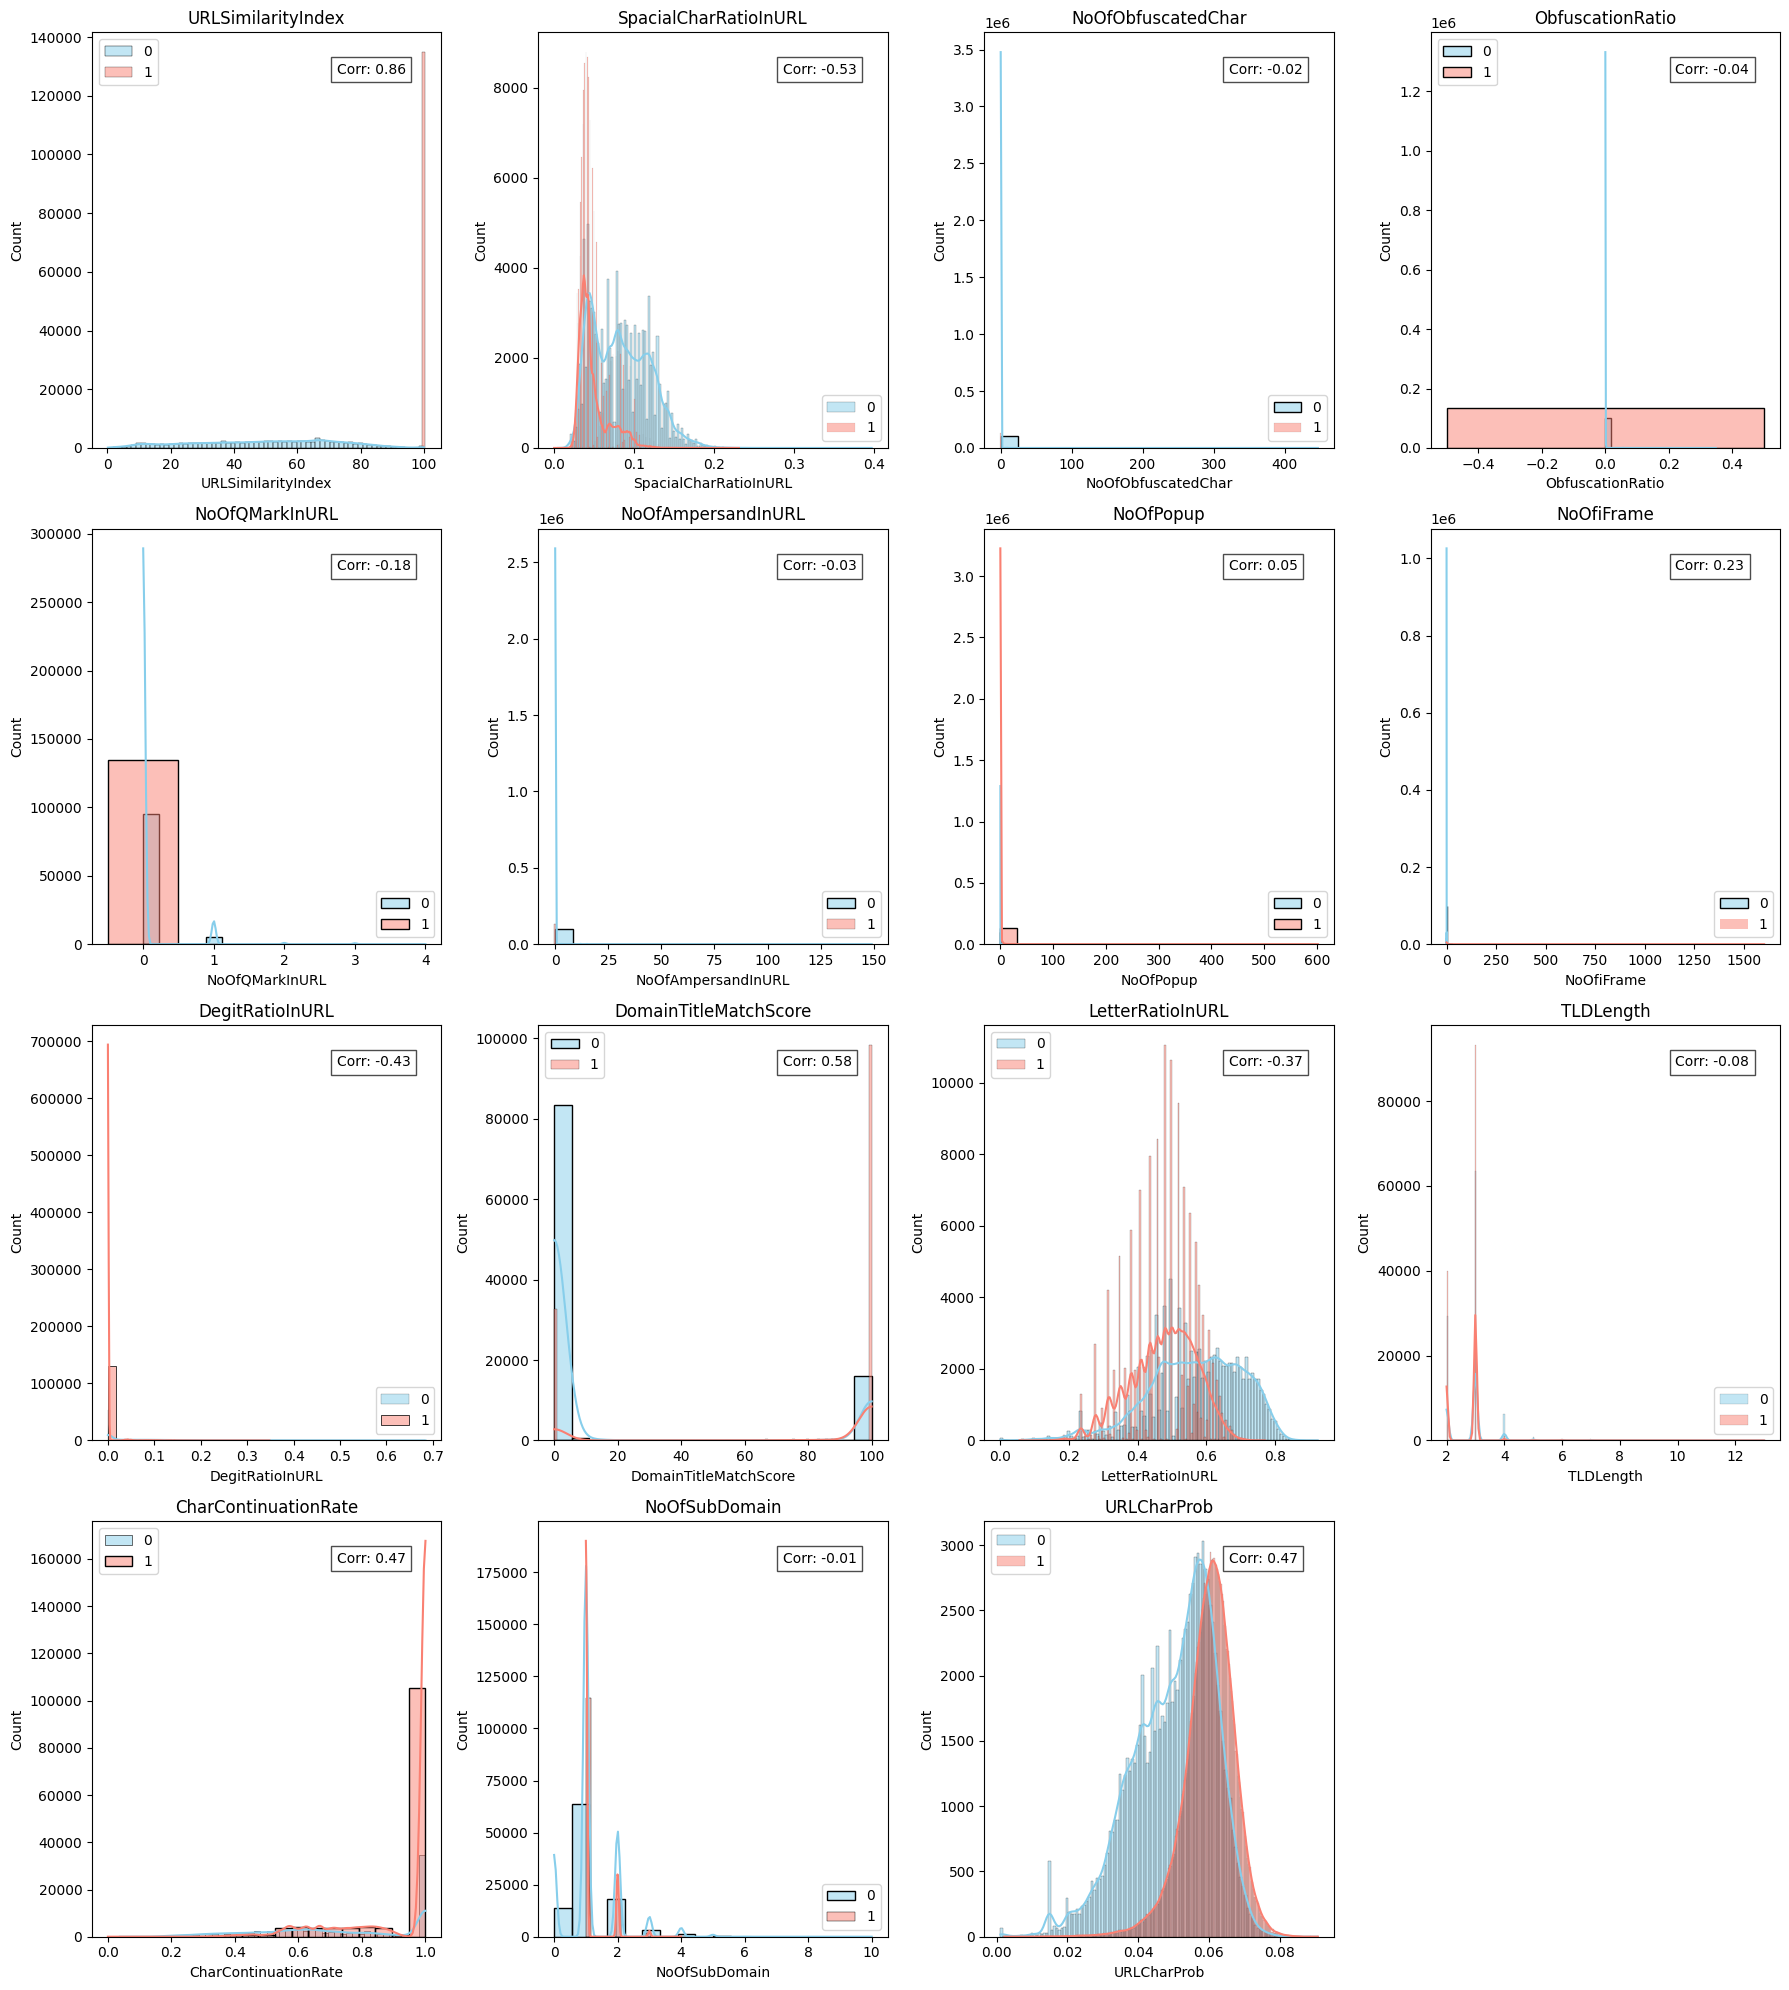

In [11]:
features = [
    "URLSimilarityIndex",
    "SpacialCharRatioInURL",
    "NoOfObfuscatedChar",
    "ObfuscationRatio",
    "NoOfQMarkInURL",
    "NoOfAmpersandInURL",
    "NoOfPopup",
    "NoOfiFrame",
    "DegitRatioInURL",
    "DomainTitleMatchScore",
    "LetterRatioInURL",
    "TLDLength",
    "CharContinuationRate",
    "NoOfSubDomain",
    "URLCharProb",
]

# features = continuous_numeric_cols
cols = 4
num_features = len(features)
rows = (num_features + cols - 1) // cols

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(18, 5 * rows))
axes = axes.flatten()

for i, feature in enumerate(features):
    if feature in df.columns:
        legit_data = df[df["label"] == 0][feature].dropna()
        phish_data = df[df["label"] == 1][feature].dropna()

        sns.histplot(
            legit_data, color="skyblue", label="0", kde=True, ax=axes[i], alpha=0.5
        )
        sns.histplot(
            phish_data, color="salmon", label="1", kde=True, ax=axes[i], alpha=0.5
        )

        axes[i].set_title(f"{feature}", fontsize=12)
        axes[i].legend()

        corr = np.corrcoef(df[feature], df["label"])[0, 1]
        axes[i].text(
            0.7,
            0.9,
            f"Corr: {corr:.2f}",
            transform=axes[i].transAxes,
            bbox=dict(facecolor="white", alpha=0.7),
        )

for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

correlations = df[features + ["label"]].corr()["label"].drop("label").abs()


display(
    pd.DataFrame({"Feature": correlations.index, "Correlation": correlations.values})
    .sort_values(by="Correlation", ascending=False)
    .head(10)
    .style.set_table_styles(TABLE_LAYOUT)
    .set_table_attributes('style="width: 100%;"')
    .hide(axis="index")
)

##### Visual inspection of continuous and binary features

Each proportion bar shows the distribution of labels within a given feature value — helping us identify which traits are more common among phishing samples.

Numeric Features like `URLSimilarityIndex`, `DomainTitleMatchScore`, and `SpacialCharRatioInURL` show some separation between legitimate and phishing samples, indicating that phishing URLs:

>- Differ from known legitimate domain patterns
>- Use more special characters and digits
>- Exhibit inconsistent or misleading title/domain matching.

Binary Features revealed some phishing indicators like `HasExternalFormSubmit`, `HasSocialNet`, `Pay`, and `Crypto` are associated with phishing when they belong to that group.

> For each binary feature, we analyzed how the presence (1) or absence (0) of that feature relates to phishing likelihood. Features like `HasSocialNet = 1` and `Pay = 1` are strong phishing indicators. Others like `IsHTTPS = 0` are strongly associated with legitimate pages.


### Data Relations Exploration
  * Explore relationships between attributes: Look at the attributes via scatter
plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.

#### Correlation Between Target and Features

##### Correlation Summary Table

| Feature                | Correlation with Label | Summary                                                             |
|------------------------|------------------------|---------------------------------------------------------------------|
| URLSimilarityIndex     | 0.86                   | Strong discriminator; low similarity implies phishing.              |
| DomainTitleMatchScore  | 0.58                   | Mismatch between title and domain is a phishing signal.             |
| SpacialCharRatioInURL  | 0.53                   | Phishing URLs use more special characters to obfuscate.             |
| CharContinuationRate   | 0.47                   | Character continuity (like dashes) indicates obfuscation.           |
| DegitRatioInURL        | 0.43                   | High digit ratio suggests machine-generated phishing URLs.          |
| LetterRatioInURL       | 0.36                   | Legitimate URLs use more natural language characters.               |
| NoOfiFrame             | 0.23                   | Phishing sites more frequently use iframe for embedding.            |
| NoOfQMarkInURL         | 0.18                   | More '?' in phishing URLs, possibly query string tricks.            |
| TLDLength              | 0.08                   | Weak individual signal, possibly useful in combination.             |
| NoOfPopup              | 0.05                   | Low value alone; may indicate malicious popups if combined.         |


##### Correlation Summary

The correlation matrix display linear relationships:

- Correlation with Label (Pishing / Legitimate):

>  - `URLSimilarityIndex` had the strongest correlation with the target label (`+0.86`).
>  - Another set moderately correlated features include `DomainTitleMatchScore`, `SpacialCharRatioInURL`, `CharContinuationRate`, and `DegitRatioInURL`.

#### Correlation Matrix

In [12]:
# Create correlation matrix
corr_matrix = df[continuous_numeric_cols].corr()
# print(corr_matrix)

# Filter for strong correlations
threshold = 0.7
strong_corr = corr_matrix.copy()
strong_corr = strong_corr.where(
    np.triu(np.ones(strong_corr.shape), k=1).astype(bool)
)  # Upper triangle only
strong_pairs = strong_corr.stack().reset_index()
strong_pairs.columns = ["Feature1", "Feature2", "Correlation"]
strong_pairs["AbsCorr"] = strong_pairs["Correlation"].abs()
strong_pairs = strong_pairs[strong_pairs["AbsCorr"] > threshold].sort_values(
    by="AbsCorr", ascending=False
)
strong_pairs

Feature1                    Feature2  Correlation   AbsCorr
420  DomainTitleMatchScore          URLTitleMatchScore     0.961008  0.961008
9                URLLength            NoOfLettersInURL     0.956047  0.956047
11               URLLength             NoOfDegitsInURL     0.835809  0.835809
295        NoOfDegitsInURL             NoOfEqualsInURL     0.806024  0.806024
219     NoOfObfuscatedChar          NoOfAmpersandInURL     0.786451  0.786451
331        NoOfEqualsInURL  NoOfOtherSpecialCharsInURL     0.784654  0.784654
16               URLLength  NoOfOtherSpecialCharsInURL     0.782582  0.782582
298        NoOfDegitsInURL  NoOfOtherSpecialCharsInURL     0.767477  0.767477
217     NoOfObfuscatedChar             NoOfEqualsInURL     0.754543  0.754543
215     NoOfObfuscatedChar             NoOfDegitsInURL     0.721216  0.721216
101   CharContinuationRate       SpacialCharRatioInURL    -0.711020  0.711020
147            URLCharProb             DegitRatioInURL    -0.708875  0.708875
463            NoOfSelfRef             NoOfExternalRef     0.700668  0.700668

- Correlated Features (Corr > 0.8):
>  - `URLLength` appears to be correlated with `NoOfLettersInURL` and `NoOfDegitsInURL`.
>  - `NoOfEqualsInURL`, `NoOfOtherSpecialCharsInURL`, and `NoOfObfuscatedChar` also show high inter-correlations, suggesting potential multicollinearity.
>  - `DomainTitleMatchScore` and `URLTitleMatchScore` correlate at `+0.96` — candidates for dimensionality reduction.

#### Cross-tabulation


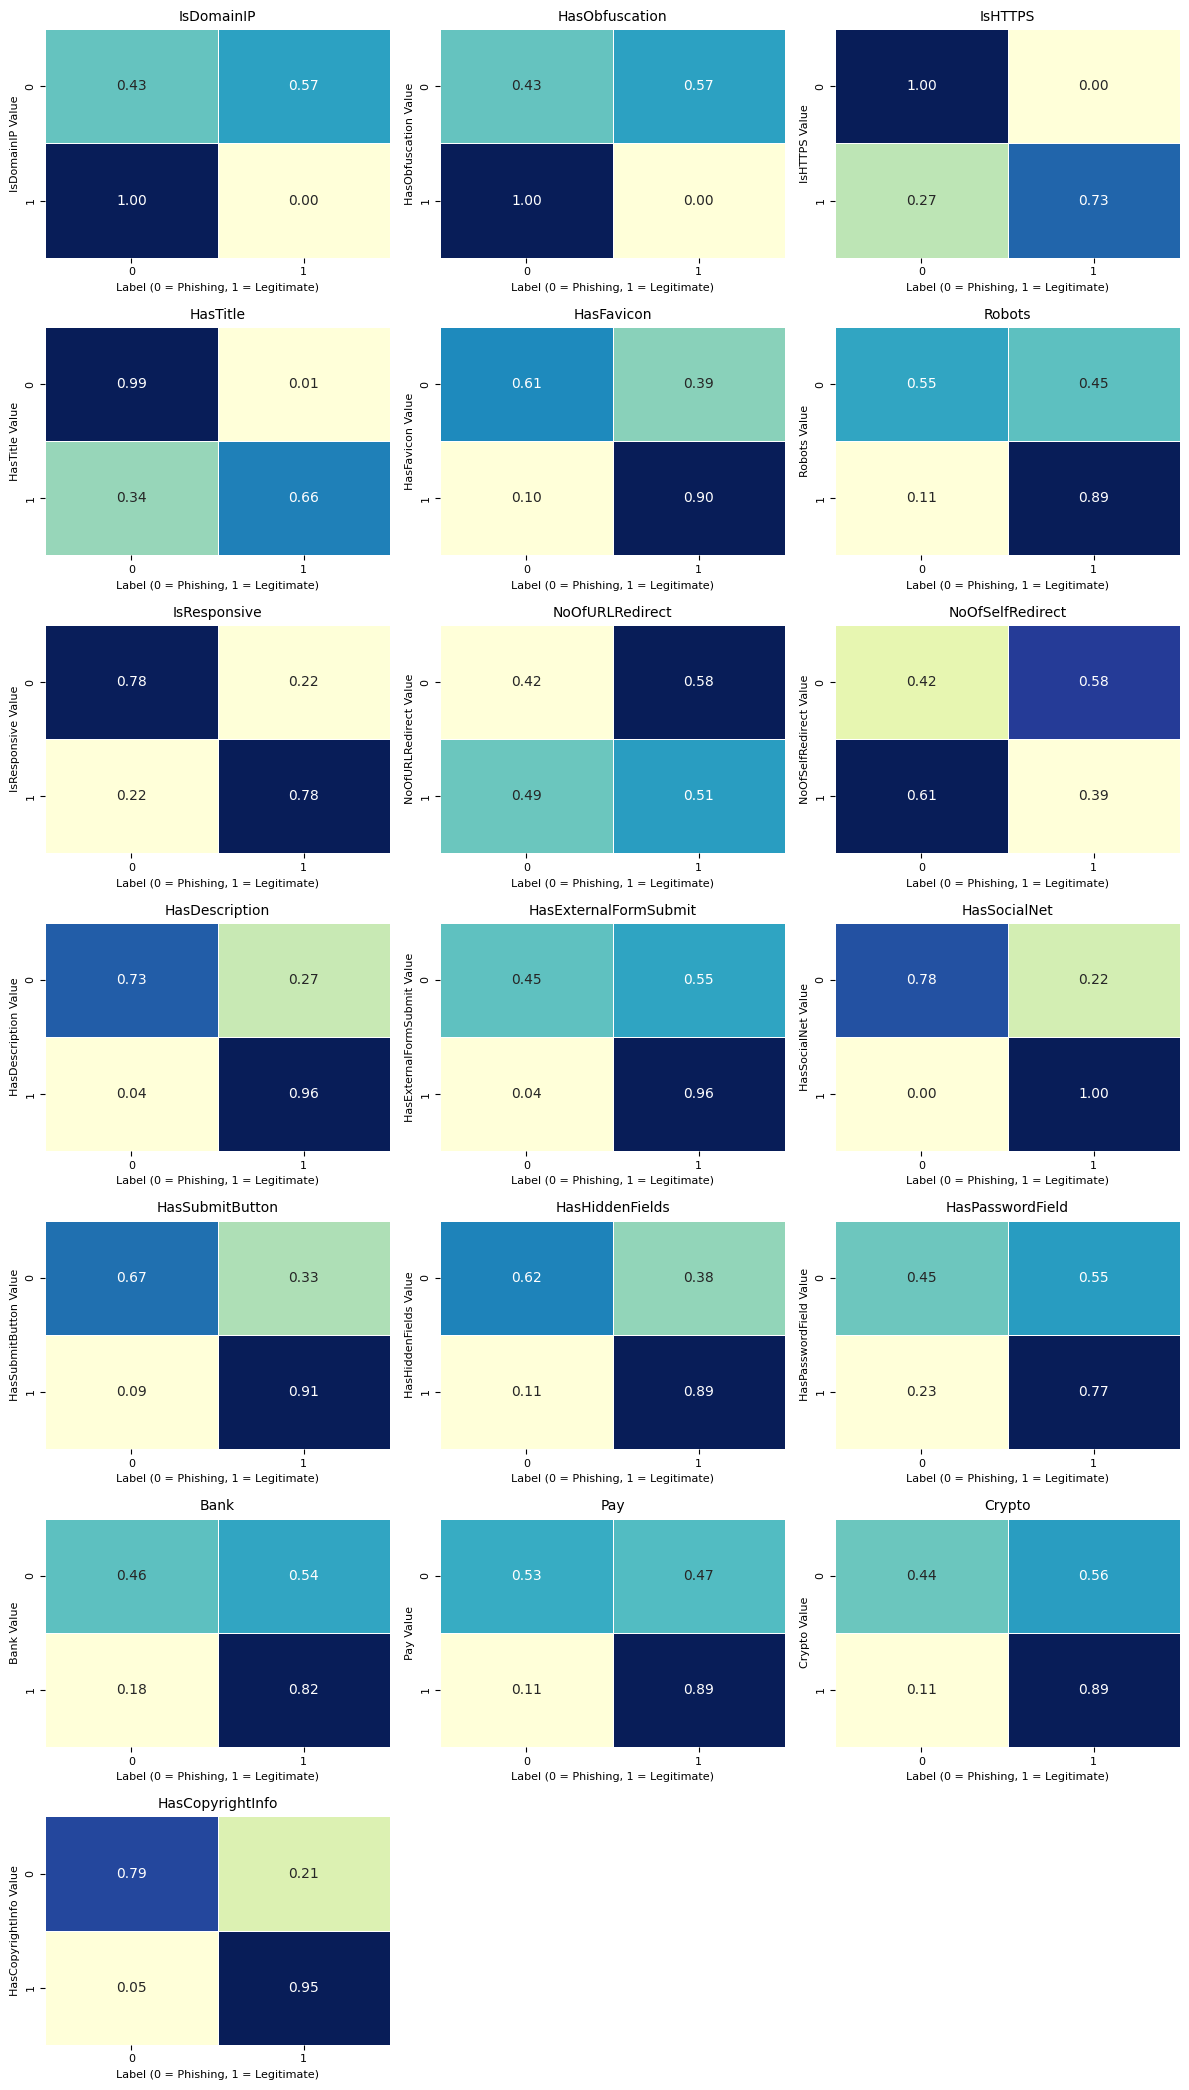

Feature  Binary Value (0/1) Pct Legitimate Pct Phishing  \
0              IsDomainIP                   0          42.7%        57.3%   
1              IsDomainIP                   1         100.0%         0.0%   
2          HasObfuscation                   0          42.7%        57.3%   
3          HasObfuscation                   1         100.0%         0.0%   
4                 IsHTTPS                   0         100.0%         0.0%   
5                 IsHTTPS                   1          26.9%        73.1%   
6                HasTitle                   0          99.5%         0.5%   
7                HasTitle                   1          33.7%        66.3%   
8              HasFavicon                   0          61.2%        38.8%   
9              HasFavicon                   1          10.4%        89.6%   
10                 Robots                   0          54.5%        45.5%   
11                 Robots                   1          10.6%        89.4%   
12           IsResponsive                   0          77.8%        22.2%   
13           IsResponsive                   1          21.8%        78.2%   
14        NoOfURLRedirect                   0          41.9%        58.1%   
15        NoOfURLRedirect                   1          48.7%        51.3%   
16       NoOfSelfRedirect                   0          42.0%        58.0%   
17       NoOfSelfRedirect                   1          61.3%        38.7%   
18         HasDescription                   0          73.1%        26.9%   
19         HasDescription                   1           4.3%        95.7%   
20  HasExternalFormSubmit                   0          44.6%        55.4%   
21  HasExternalFormSubmit                   1           4.2%        95.8%   
22           HasSocialNet                   0          78.4%        21.6%   
23           HasSocialNet                   1           0.5%        99.5%   
24        HasSubmitButton                   0          66.9%        33.1%   
25        HasSubmitButton                   1           8.8%        91.2%   
26        HasHiddenFields                   0          62.4%        37.6%   
27        HasHiddenFields                   1          10.6%        89.4%   
28       HasPasswordField                   0          45.1%        54.9%   
29       HasPasswordField                   1          22.6%        77.4%   
30                   Bank                   0          46.4%        53.6%   
31                   Bank                   1          18.3%        81.7%   
32                    Pay                   0          52.7%        47.3%   
33                    Pay                   1          10.9%        89.1%   
34                 Crypto                   0          43.6%        56.4%   
35                 Crypto                   1          11.0%        89.0%   
36       HasCopyrightInfo                   0          78.6%        21.4%   
37       HasCopyrightInfo                   1           5.0%        95.0%   

                                       Interpretation  
0          Value=0 is not a reliable class indicator.  
1   Value=1 appears frequently in legitimate samples.  
2          Value=0 is not a reliable class indicator.  
3   Value=1 appears frequently in legitimate samples.  
4   Value=0 is a strong indicator of legitimate pa...  
5       Value=1 is associated with phishing behavior.  
6   Value=0 is a strong indicator of legitimate pa...  
7                      Value=1 leans toward phishing.  
8                    Value=0 leans toward legitimate.  
9       Value=1 is associated with phishing behavior.  
10         Value=0 is not a reliable class indicator.  
11      Value=1 is associated with phishing behavior.  
12    Value=0 is associated with legitimate behavior.  
13      Value=1 is associated with phishing behavior.  
14         Value=0 is not a reliable class indicator.  
15  Value=1 appears frequently in legitimate samples.  
16         Value=0 is not a reliable class indicator.  
17  Va

In [13]:
summary_rows = []


# Updated heatmap + summary extraction function
def cross_tab_analysis(df, feature, ax, target="label"):
    if feature not in df.columns:
        print(f"Feature '{feature}' not found in DataFrame.")
        return

    # Create normalized crosstab
    ctab = pd.crosstab(df[feature], df[target], normalize="index")

    # Plot heatmap
    sns.heatmap(
        ctab,
        annot=True,
        cmap="YlGnBu",
        fmt=".2f",
        ax=ax,
        cbar=False,
        linewidths=0.5,
        linecolor="white",
    )
    ax.set_title(f"{feature}", fontsize=10)
    ax.set_ylabel(f"{feature} Value", fontsize=8)
    ax.set_xlabel("Label (0 = Phishing, 1 = Legitimate)", fontsize=8)
    ax.tick_params(axis="both", which="major", labelsize=8)

    # Also compute summary rows
    contingency_table = pd.crosstab(df[feature], df[target])
    for feat_value in contingency_table.index:
        legit = (
            contingency_table.loc[feat_value, 0]
            if 0 in contingency_table.columns
            else 0
        )
        phish = (
            contingency_table.loc[feat_value, 1]
            if 1 in contingency_table.columns
            else 0
        )
        total = legit + phish

        if total > 0:
            legit_prop = legit / total
            phish_prop = phish / total

            if feat_value == 1:
                if phish_prop > 0.90:
                    explanation = "Value=1 is a strong indicator of phishing."
                elif phish_prop > 0.70:
                    explanation = "Value=1 is associated with phishing behavior."
                elif phish_prop > 0.55:
                    explanation = "Value=1 leans toward phishing."
                else:
                    explanation = "Value=1 appears frequently in legitimate samples."
            else:
                if phish_prop < 0.10:
                    explanation = "Value=0 is a strong indicator of legitimate pages."
                elif phish_prop < 0.30:
                    explanation = "Value=0 is associated with legitimate behavior."
                elif phish_prop < 0.45:
                    explanation = "Value=0 leans toward legitimate."
                else:
                    explanation = "Value=0 is not a reliable class indicator."

            summary_rows.append(
                {
                    "Feature": feature,
                    "Binary Value (0/1)": feat_value,
                    "Pct Legitimate": f"{legit_prop:.1%}",
                    "Pct Phishing": f"{phish_prop:.1%}",
                    "Interpretation": explanation,
                }
            )


# Get binary features and exclude target
features = [col for col in df.columns if df[col].nunique() == 2 and col != "label"]
cols = 3
rows = (len(features) + cols - 1) // cols

# Create grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
axes = axes.flatten()

# Plot each feature + collect summary info
for i, feature in enumerate(features):
    cross_tab_analysis(df, feature, ax=axes[i])

# Remove unused axes
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Display summary table
summary_df = pd.DataFrame(summary_rows)
display(summary_df)

#### Scatterplots


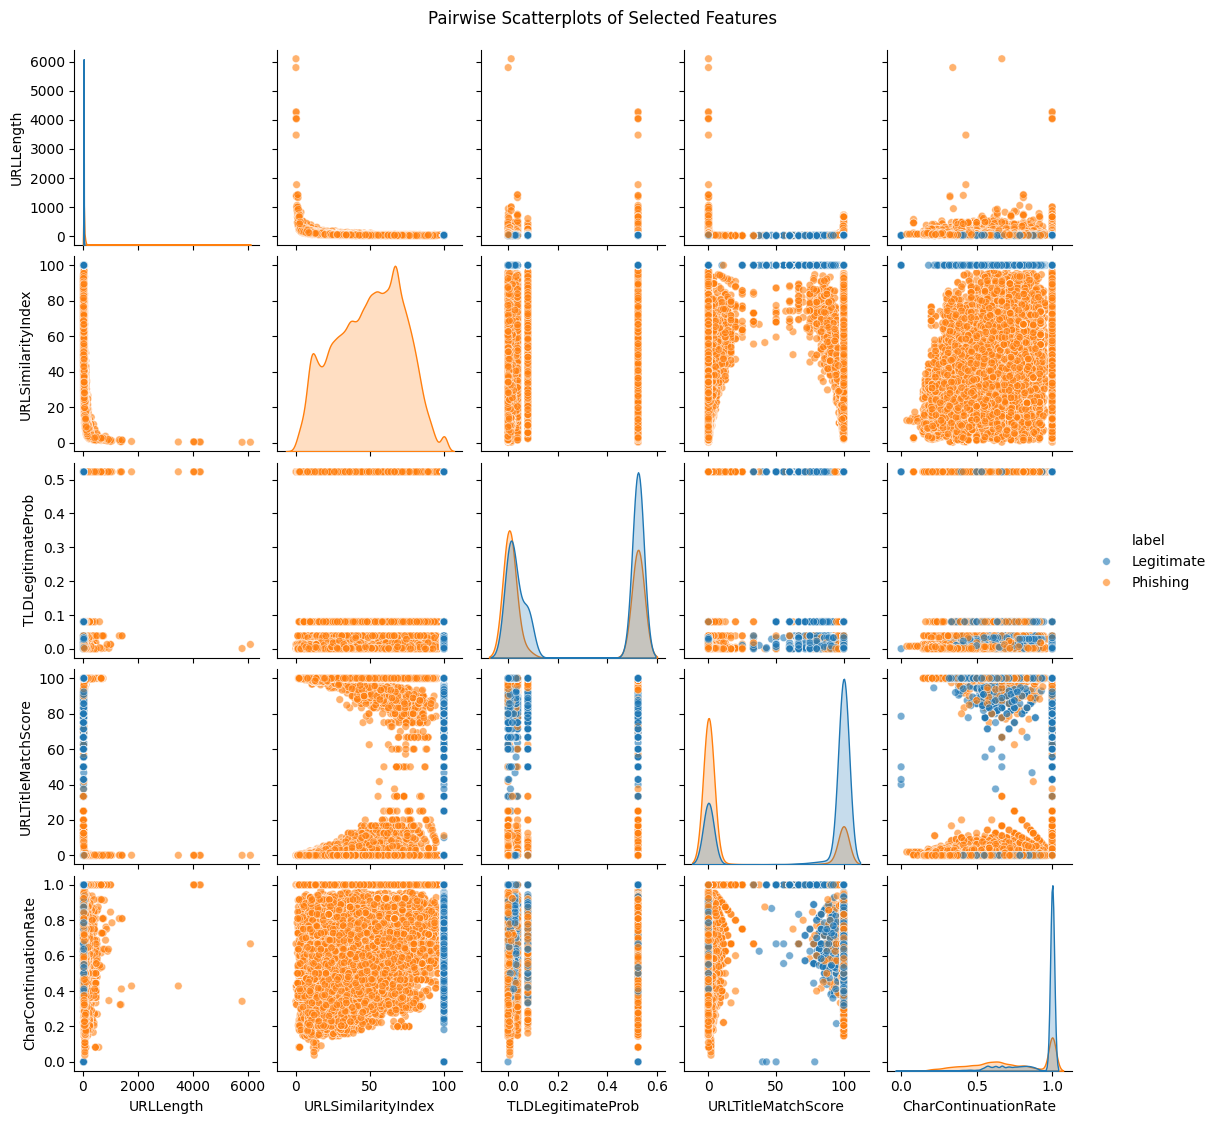

In [14]:
# Target variable
target_column = "label"

# Select a few relevant numeric features
selected_features = [
    "URLLength",
    "URLSimilarityIndex",
    "TLDLegitimateProb",
    "URLTitleMatchScore",
    "CharContinuationRate",
    target_column,
]

# Filter for numeric and available columns
existing_features = [col for col in selected_features if col in df.columns]
pairplot_df = df[existing_features].copy()

# Convert label to readable categories if it's binary 0/1
if pairplot_df[target_column].nunique() == 2:
    pairplot_df[target_column] = pairplot_df[target_column].map(
        {0: "Phishing", 1: "Legitimate"}
    )

# Pairplot
sns.pairplot(
    pairplot_df,
    hue=target_column,
    diag_kind="kde",
    plot_kws={"alpha": 0.6, "s": 30},
    height=2.2,
)
plt.suptitle("Pairwise Scatterplots of Selected Features", y=1.02)
plt.show()

Key Findings

- **URLLength**:
  - Phishing URLs tend to be significantly longer, with many extreme values.
  - Legitimate URLs cluster at shorter lengths.
  - Long URLs may indicate obfuscation or malicious intent.

- **URLSimilarityIndex**:
  - Phishing URLs often have a low similarity to known domains.
  - Legitimate URLs exhibit higher similarity values.
  - Strong indicator of impersonation or spoofing.

- **TLDLegitimateProb**:
  - Phishing URLs are concentrated at low probability values, often using obscure or low-trust top-level domains.
  - Legitimate URLs span a broader range of values.
  - This feature may carry strong predictive value.

- **URLTitleMatchScore**:
  - Legitimate URLs usually have a high match score between their title and domain name.
  - Phishing pages tend to score low in this regard.
  - Effective for detecting semantic inconsistencies.

- **CharContinuationRate**:
  - Legitimate URLs are tightly clustered near 1.0, indicating smoother or more natural character patterns.
  - Phishing URLs are more widely distributed, suggesting the use of obfuscation or randomly generated strings.
  - Potentially useful for capturing character-level anomalies.

Feature Interactions:

- Certain **combinations of features** — such as high `URLLength` with low `URLTitleMatchScore` — are commonly found in phishing URLs.
- Multivariate relationships suggest that **tree-based models** or **ensemble methods** may capture these patterns effectively.



#### Group-Wise Averages

In [15]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

# Filter for binary features (2 unique values) among numeric columns
binary_numeric_features = [col for col in numeric_cols if df[col].nunique() == 2]

print("Binary Features with Numeric Labels (0/1 or similar):")
for feature in binary_numeric_features:
    print(f"• {feature}")

Binary Features with Numeric Labels (0/1 or similar):
• IsDomainIP
• HasObfuscation
• IsHTTPS
• HasTitle
• HasFavicon
• Robots
• IsResponsive
• NoOfURLRedirect
• NoOfSelfRedirect
• HasDescription
• HasExternalFormSubmit
• HasSocialNet
• HasSubmitButton
• HasHiddenFields
• HasPasswordField
• Bank
• Pay
• Crypto
• HasCopyrightInfo
• label


In [16]:
# Identifying and dropping features that are binary
binary_numeric_features = [
    col for col in continuous_numeric_cols if df[col].nunique() == 2
]
# print("Binary Numeric Features:", binary_numeric_features)

filtered_numeric_df = df[continuous_numeric_cols].drop(columns=binary_numeric_features)

# Join the 'label' column to group on
filtered_numeric_df["label"] = df["label"]

# Group by 'label' and calculate means
grouped_means = filtered_numeric_df.groupby("label").mean().T
grouped_means.columns = ["Phishing (0)", "Legitimate (1)"]
grouped_means["Difference"] = (
    grouped_means["Legitimate (1)"] - grouped_means["Phishing (0)"]
)

# Sort by absolute difference
grouped_means_sorted = grouped_means.sort_values(
    by="Difference", key=abs, ascending=False
)

# Display results
print("Group-Wise Averages (Excluding Binary Numeric Features):")
display(grouped_means_sorted.head(15))

Group-Wise Averages (Excluding Binary Numeric Features):


Phishing (0)  Legitimate (1)    Difference
LargestLineLength      20021.448244     7375.919555 -12645.528689
LineOfCode                65.730467     1947.491680   1881.761213
NoOfSelfRef                0.496032      113.410241    112.914209
NoOfExternalRef            1.128119       85.294601     84.166482
DomainTitleMatchScore     16.548205       75.270904     58.722698
URLTitleMatchScore        21.198164       75.270904     54.072739
URLSimilarityIndex        49.616973      100.000000     50.383027
NoOfImage                  0.866492       44.946600     44.080108
URLLength                 45.720293       26.228610    -19.491684
NoOfJS                     0.890336       17.732532     16.842196
NoOfLettersInURL          28.106583       12.933059    -15.173524
NoOfCSS                    0.439616       10.744820     10.305205
DomainLength              24.465144       19.228610     -5.236535
NoOfDegitsInURL            4.326217        0.050597     -4.275620
NoOfEmptyRef               0.150379        4.044887      3.894508

Summary of Group-Wise Averages (Excluding Binary Features)

The table of group-wise averages reveals several key differences between phishing and legitimate URLs.

**Features Significantly Higher in Phishing URLs**

- **LargestLineLength**: Phishing pages tend to contain much longer individual lines of code, possibly due to script obfuscation or compressed malicious content.
- **URLLength**: Phishing URLs are generally longer, potentially including misleading tokens or complex subpaths to appear legitimate.
- **NoOfLettersInURL**: Phishing URLs often contain more characters, likely to mimic trusted domains or evade detection.
- **DomainLength** and **NoOfDegitsInURL**: Phishing domains tend to include more characters and digits than legitimate ones.

**Features Significantly Higher in Legitimate URLs**

- **LineOfCode**: Legitimate pages contain significantly more source code, suggesting a richer and more complete structure.
- **NoOfSelfRef**, **NoOfExternalRef**, **NoOfImage**: Legitimate pages reference more internal and external resources and contain more images.
- **URLTitleMatchScore**, **DomainTitleMatchScore**, **URLSimilarityIndex**: Legitimate pages have a higher semantic and structural alignment between their URL, title, and domain.
- **NoOfJS**, **NoOfCSS**: Legitimate pages tend to use more JavaScript and CSS resources, indicating a more fully developed front-end.


### PCA

#### PCA Analysis - 2D Space

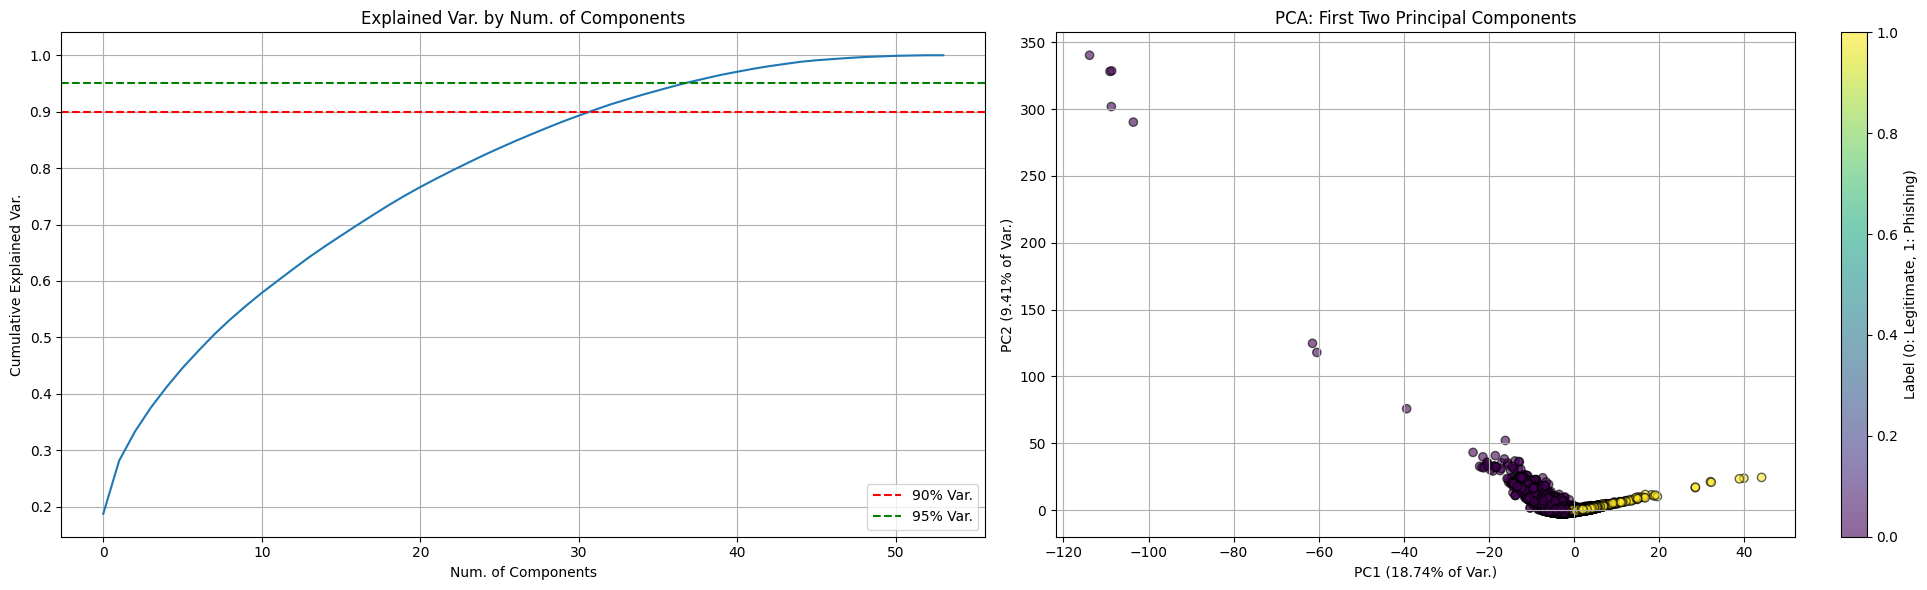

In [17]:
df_pca = df.copy()

categorical_cols = df_pca.select_dtypes(include=["object", "category"]).columns
le = LabelEncoder()
for col in categorical_cols:
    df_pca[col] = le.fit_transform(df_pca[col].astype(str))

X = df_pca.drop("label", axis=1)
y = df_pca["label"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Num. of Components")
plt.ylabel("Cumulative Explained Var.")
plt.axhline(y=0.90, color="r", linestyle="--", label="90% Var.")
plt.axhline(y=0.95, color="g", linestyle="--", label="95% Var.")
plt.title("Explained Var. by Num. of Components")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
scatter = plt.scatter(
    X_pca[:, 0], X_pca[:, 1], c=y, alpha=0.6, cmap="viridis", edgecolor="k"
)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.2%} of Var.)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.2%} of Var.)")
plt.title("PCA: First Two Principal Components")
plt.colorbar(scatter, label="Label (0: Legitimate, 1: Phishing)")
plt.grid(True)

plt.tight_layout()
plt.show()


##### Variance explained

- The first 15–25 components capture over 90% of the total variance.
- This suggests we have feature redundancy, we still can reduce dimensionality without losing much information.
- Using the top 30–35 components preserves 95% of variance.

##### 2D PCA Projection

- The PC-1 and PC-2 components capture approximately 28% of the total variance (PC1: 18.74%, PC2: 9.41%).
- Phishing (label = 1) and legitimate (label = 0) samples tend to separate along PC1, with phishing points (yellow) grouped distinctly.
- Some overlap still exists, but there’s evident directional separation, some linear models may already benefit from PCA-projected data.

> We have a great potential to reduce dimensionality without losing much information and still have a clear separation between phishing and legitimate samples.

#### PCA Analysis - Importances

In [18]:
fig = px.scatter_3d(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    z=X_pca[:, 2],
    color=y,
    labels={"x": "PC1", "y": "PC2", "z": "PC3"},
    title="3D PCA Visualization",
    color_continuous_scale=px.colors.sequential.Viridis,
    opacity=0.7,
)
fig.update_traces(marker=dict(size=3))
fig.show()

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
correlation_matrix = pd.DataFrame(
    loadings,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)],
    index=X.columns,
)

top_features = 5
pc_columns = [f"PC{i+1}" for i in range(5)]
table_data = []

for pc in pc_columns:
    top = (
        correlation_matrix[pc]
        .abs()
        .sort_values(ascending=False)
        .head(top_features)
        .reset_index()
    )
    top.columns = ["Feature", "Importance"]
    top["PC"] = pc
    table_data.append(top)

result_table = pd.concat(table_data)
pivot_table = result_table.pivot(
    index="Feature", columns="PC", values="Importance"
).round(4)

display(
    pivot_table.style.background_gradient(cmap="viridis", axis=None)
    .set_caption("Top Features per Principal Component")
    .set_table_styles(TABLE_LAYOUT)
    .set_table_attributes('style="width: 100%;"')
)

#### PCA Component Loadings: Top Features Driving Each PC


- PC1 – Identity, Trust & Brand Signals (Explains ~18.7% of variance):

>- Dominated by: `URLSimilarityIndex`, `URL`, `HasSocialNet`, `DomainTitleMatchScore`, `HasCopyrightInfo`
>- PC1 captures variation in how closely a page mimics legitimate branding or domains. Features in this axis are aligned with phishing copying branding vs. authentic identity.

- PC2 – URL Complexity & Special Character Usage (Url Structure)
>- Dominated by: `NoOfDegitsInURL`, `NoOfEqualsInURL`, `URLLength`, `NoOfAmpersandInURL`, `NoOfOtherSpecialCharsInURL`
>- PC2 reflects the syntactic complexity and obfuscation of URLs. High values suggest digit-heavy and large special-character URLs, seems to be frequent in phishing.

- PC3 – Obfuscation & Semantic Mismatch
>- Dominated by: `CharContinuationRate`, `NoOfSubDomain`, `SpacialCharRatioInURL`, `DomainTitleMatchScore`
>- Captures character-level tricks (like long subdomains, repetition, and symbol use) combined with semantic mismatch between domain and title. Phishing sites often manipulate these.

- PC4 – Domain Metadata & Technical Features
>- Dominated by: `TLDLegitimateProb`, `TLD`, `LetterRatioInURL`, `DomainLength`
>- Relates to technical meta-properties of the domain — Reflecting the use of the TLD, the amount of text content, and domain length. Has a subtle and useful signal.

- PC5 – Source Code Structure & External Link Behavior
>- Dominated by: `LineOfCode`, `NoOfExternalRef`, `NoOfImage`, `NoOfSelfRef`, `Title`
>- This axis represents how the internal structure and visual complexity of a page behaves. Legitimate pages tend to include images, code depth, and self-referencing links.